In [1]:
import numpy as np
data = np.load('data.npz') 
X = data['features'] 
y = data['labels']

In [2]:
print("Shape of X {}".format(X.shape))
print("Shape of y {}".format(y.shape))

Shape of X (5645, 12)
Shape of y (5645,)


We have 5645 rows and 12 columns

In [3]:
print("Data type of X {}".format(X.dtype))
print("Data type of y {}".format(y.dtype))

Data type of X float64
Data type of y int32


In [4]:
print("First 5 samples of X {}".format(X[:5]))
print("First 5 labels of y {}".format(y[:5]))

First 5 samples of X [[ 6.00000000e+01  8.54000000e-01  5.64000000e-01  1.00000000e+00
  -4.96400000e+00  4.85000000e-02  1.71000000e-02  1.77561925e-01
   8.49000000e-02  8.99000000e-01  1.34071000e+02  2.34596000e+05]
 [ 6.60000000e+01  8.53000000e-01  5.97000000e-01  1.00000000e+01
  -6.52800000e+00  5.55000000e-02  2.12000000e-02  1.77561925e-01
   1.22000000e-01  5.69000000e-01  1.07033000e+02  1.73968000e+05]
 [ 4.80000000e+01  6.74000000e-01  6.58000000e-01  5.00000000e+00
  -9.64700000e+00             nan  4.04000000e-01  1.34000000e-06
   9.81000000e-02  6.77000000e-01  1.43292000e+02  3.29387000e+05]
 [ 1.40000000e+01  7.16000000e-01  8.85000000e-01  1.00000000e+00
  -4.34800000e+00  3.33000000e-02  6.14000000e-02  1.77561925e-01
   2.53000000e-01  8.33000000e-01  1.28043000e+02  1.64093000e+05]
 [ 1.10000000e+01  4.91000000e-01  5.63000000e-01  7.00000000e+00
  -8.58800000e+00  3.31000000e-02             nan  2.30000000e-03
   2.63000000e-01  8.43000000e-01  9.55580000e+01  

In [5]:
print("Number of NaNs in X:", np.isnan(X).sum())
print("Number of NaNs in y:", np.isnan(y).sum())

Number of NaNs in X: 3387
Number of NaNs in y: 0


In [6]:
unique, counts = np.unique(y, return_counts=True)
print("Label distribution:")
print(dict(zip(unique, counts)))

Label distribution:
{0: 1272, 1: 402, 2: 1447, 3: 2524}


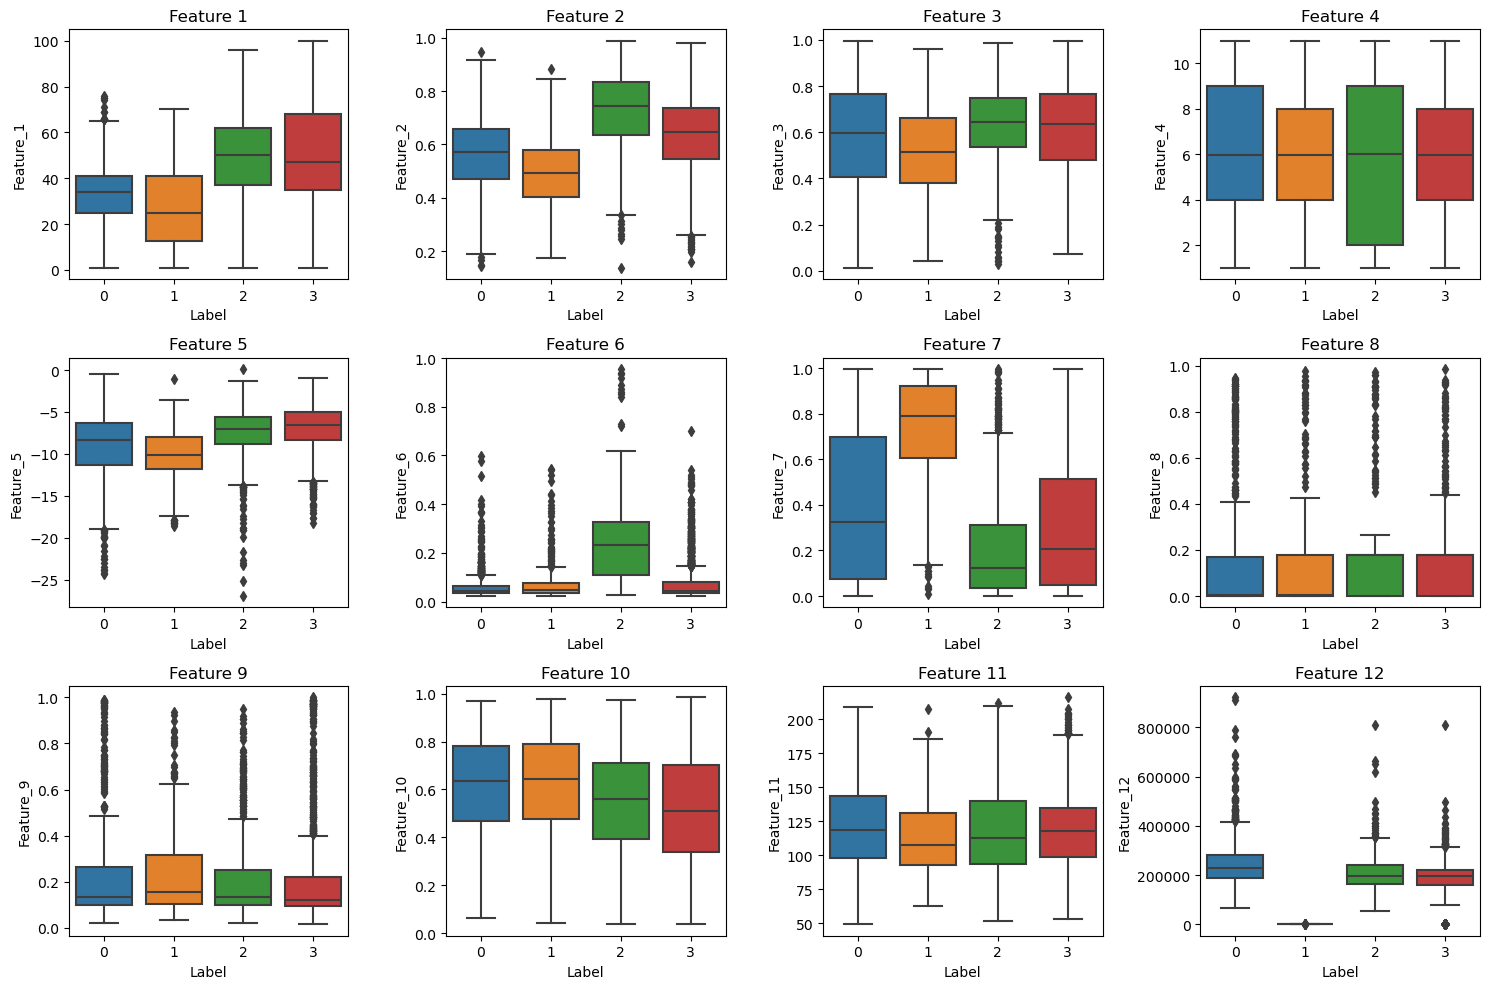

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert data to a DataFrame for easier plotting
data_df = pd.DataFrame(X, columns=[f"Feature_{i+1}" for i in range(X.shape[1])])
data_df['Label'] = y  # Add the labels as a separate column

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Generate a box plot for each feature
for i in range(12):
    plt.subplot(3, 4, i + 1)  # Create a 3x4 grid for 12 plots
    sns.boxplot(x='Label', y=f'Feature_{i+1}', data=data_df)
    plt.title(f'Feature {i+1}')
    plt.tight_layout()

plt.show()

In [8]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split


imp = SimpleImputer()
X_imputed = imp.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train = imp.fit_transform(X_train)
X_test = imp.transform(X_test)
print(X_train[0:10,:])

[[ 3.80000000e+01  5.31000000e-01  9.04000000e-01  1.10000000e+01
  -5.33400000e+00  4.43000000e-02  1.04000000e-04  8.87000000e-03
   7.86000000e-02  8.47000000e-01  1.47846000e+02  2.05267000e+05]
 [ 3.70000000e+01  5.58000000e-01  3.57000000e-01  2.00000000e+00
  -9.38200000e+00  9.83000000e-02  8.96000000e-01  1.77561925e-01
   3.42000000e-01  6.91000000e-01  1.19958000e+02  2.11947000e+05]
 [ 3.70000000e+01  6.32000000e-01  8.00000000e-01  5.00000000e+00
  -7.22700000e+00  2.34000000e-01  5.47000000e-01  1.77561925e-01
   1.47000000e-01  4.96000000e-01  9.27570000e+01  2.09833000e+05]
 [ 3.90000000e+01  5.06000000e-01  5.83000000e-01  9.00000000e+00
  -6.98900000e+00  1.08000000e-01  1.33000000e-01  1.77561925e-01
   2.54000000e-01  4.45000000e-01  1.19238329e+02  2.29037000e+05]
 [ 9.00000000e+00  3.69000000e-01  3.87000000e-01  5.00000000e+00
  -1.13810000e+01  3.59000000e-02  9.93000000e-01  7.02000000e-01
   1.29000000e-01  7.46000000e-01  1.67715000e+02  2.97438333e+00]
 [ 6.

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model 1: Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

par_grid = {
    'max_depth':[1, 2, 4, 6, 8],
    'min_samples_split':[2,3,4],
    'min_samples_leaf':[1,2,4,6],
    'max_features':['sqrt', 'log2', 0.5, 0.75]
}
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_random_search = RandomizedSearchCV(rf, par_grid, cv=5, n_iter=20, random_state=42)
rf_random_search.fit(X_train, y_train)

print("Test set score: {:.2f}".format(rf_random_search.score(X_test, y_test)))
print("Best hyperparameters: {}".format(rf_random_search.best_params_))
print("Best cross-validation score: {:.2f}".format(rf_random_search.best_score_))

Test set score: 0.72
Best hyperparameters: {'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 8}
Best cross-validation score: 0.75


In [11]:
final_model_rf = RandomForestClassifier(random_state=42, class_weight='balanced',
                           max_depth=8,
                           max_features='log2',
                           min_samples_split=4, min_samples_leaf=1)

final_model_rf.fit(X_train, y_train)

# Evaluate the final performance on the test set
print("Final test accuracy:", final_model_rf.score(X_test, y_test))

Final test accuracy: 0.7209631728045326


# Model 2: Neural network (MLP)

In [12]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

p_grid = {'alpha':[0.001, 1, 10],
          'activation':["relu", "tanh"],
          'solver':['sgd', 'adam']
}

mlp = MLPClassifier(hidden_layer_sizes= (12,12), random_state=42, max_iter=10000)
random_search = RandomizedSearchCV(mlp, p_grid, cv=5, n_iter=4, random_state=42)

random_search.fit(X_train, y_train)
print("Test set score: {:.2f}".format(random_search.score(X_test, y_test)))

# get the best hyperparameters and the best cross-validation score
print("Best hyperparameters: {}".format(random_search.best_params_))
print("Best cross-validation score: {:.2f}".format(random_search.best_score_))


Test set score: 0.72
Best hyperparameters: {'solver': 'adam', 'alpha': 1, 'activation': 'tanh'}
Best cross-validation score: 0.75


In [13]:
final_model = MLPClassifier(hidden_layer_sizes= (12,12), random_state=42, max_iter=10000,
                           solver='adam',
                           alpha=1,
                           activation='tanh')

final_model.fit(X_train, y_train)

# Evaluate the final performance on the test set
print("Final test accuracy:", final_model.score(X_test, y_test))

Final test accuracy: 0.7230878186968839


# Model comparison
## Training time for each model

In [14]:
# Times for both models to train

# For Random Forest (Model 1)
rf_cv_results = rf_random_search.cv_results_
rf_mean_fit_time = rf_cv_results['mean_fit_time']
print("Random Forest mean training time per fit (seconds):", rf_mean_fit_time)
# Summarizing Random Forest Training Time
rf_avg_training_time = np.mean(rf_mean_fit_time)
print("Average training time for Random Forest model (seconds):", rf_avg_training_time)

# For Neural Network MLP (Model 2)
mlp_cv_results = random_search.cv_results_
mlp_mean_fit_time = mlp_cv_results['mean_fit_time']
print("Neural Network mean training time per fit (seconds):", mlp_mean_fit_time)
# Summarizing Neural Network Training Time
mlp_avg_training_time = np.mean(mlp_mean_fit_time)
print("Average training time for Neural Network model (seconds):", mlp_avg_training_time)

Random Forest mean training time per fit (seconds): [0.2146512  0.31107516 0.61179585 0.46815958 0.52777362 1.1076097
 1.94094911 0.64260449 0.23639836 1.1206327  0.40442634 0.83456583
 0.53955674 1.25111475 0.51547046 2.00207109 1.52540479 0.25318875
 0.66647587 0.81154413]
Average training time for Random Forest model (seconds): 0.7992734265327452
Neural Network mean training time per fit (seconds): [2.09528728 2.941816   5.56016402 3.58956709]
Average training time for Neural Network model (seconds): 3.546708595752716


# Classification report and confusion matrix for Random Forest model


Classification Report for Random Forest Model:
              precision    recall  f1-score   support

     Class 0       0.60      0.80      0.69       319
     Class 1       0.88      0.95      0.91        97
     Class 2       0.73      0.68      0.71       365
     Class 3       0.77      0.67      0.72       631

    accuracy                           0.72      1412
   macro avg       0.75      0.78      0.76      1412
weighted avg       0.73      0.72      0.72      1412



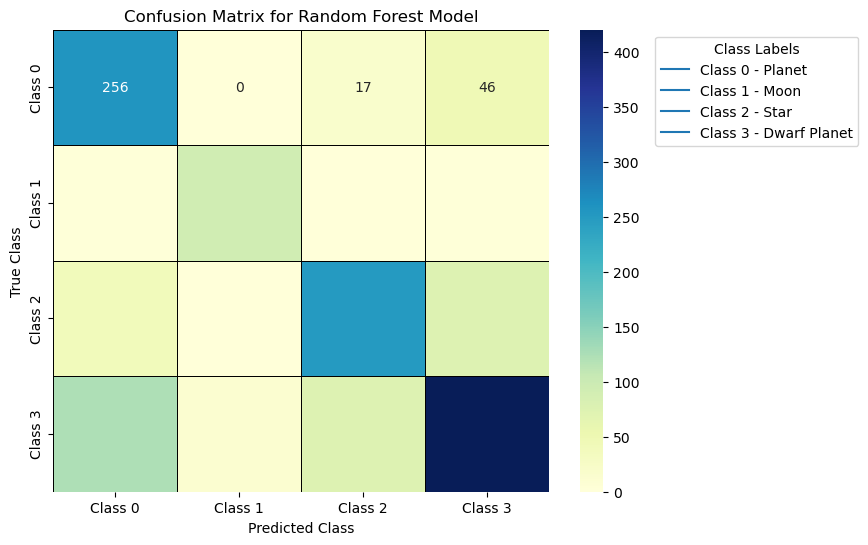

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

class_labels = ["Planet", "Moon", "Star", "Dwarf Planet"]
class_number = ['Class 0', 'Class 1', 'Class 2', 'Class 3']
label_mapping = ["Class 0 - Planet", "Class 1 - Moon", "Class 2 - Star", "Class 3 - Dwarf Planet"]

# Get predictions from the Random Forest model
y_pred_rf = final_model_rf.predict(X_test)

# Classification report
print("Classification Report for Random Forest Model:")
print(classification_report(y_test, y_pred_rf, target_names=["Class 0", "Class 1", "Class 2", "Class 3"]))

# Confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", linewidth=0.5, linecolor='black', cmap="YlGnBu", 
            xticklabels=class_number, 
            yticklabels=class_number)
plt.title("Confusion Matrix for Random Forest Model")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

handles = [plt.Line2D([0], [0], label=desc) 
           for desc in label_mapping]
plt.legend(handles = handles, title="Class Labels", loc='upper left', bbox_to_anchor=(1.2, 1))

plt.show()